# Feliz Flare Finder is a software designed to detect and validate stellar flares in photometry. 

### Currently, the "full_pipeline" function is used to detect and validate flares in *any* photometric data set, as long as the input lightcurve has inputs of time, flux and error. 

### There is also a "get_lc" function to search for photometry using "[_lightkurve_](https://docs.lightkurve.org/)". 

# Check out the example usage below


In [10]:
import os,sys
import numpy as np

# location on your machine where you store the python script
v7_pipelinepath = '/Users/daxfeliz/Desktop/PLATO/testing/V7/'
sys.path.append(v7_pipelinepath)
from PLATO_WG_FlareRemoval_V7 import get_lc, get_mission_ID, full_pipeline,__version__

print('Code Version: V'+str(__version__))

Code Version: V7


# Let's run this example of a light curve of Proxima Centauri from the TESS mission

In [2]:
starname = 'Proxima Centauri'
mission = 'TESS'

ID = get_mission_ID(starname,mission)
print(starname,'is TIC',ID)

cadence= float(2*60) #2 minute cadence data
savepath = os.getcwd()+'/' #will save all outputs to current directory, change this to be directory of your choice
downloadpath = savepath 

Proxima Centauri is TIC 388857263


In [14]:
inputLC = get_lc(ID=ID, mission=mission, 
                 cadence=cadence, downloadpath=downloadpath)
print('time stamps range from:')
print('    ',np.min(inputLC['time']),'to',np.max(inputLC['time']))
print(' ')
inputLC.head(3)

time stamps range from:
     1598.9340702152006 to 3096.6323878804956
 


,time,flux,flux_err
0,1598.934070,1.005195,0.000331
1,1598.935459,1.004942,0.000331
2,1598.936848,1.004678,0.000331


# Let's see what this lightcurve looks like:

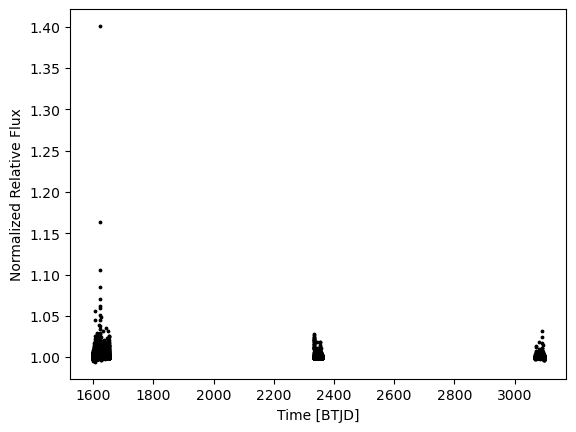

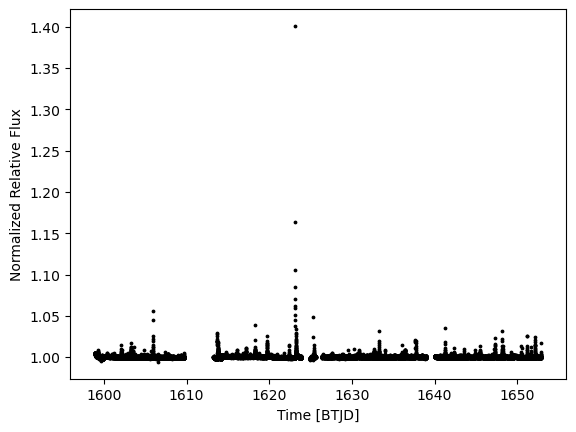

In [22]:
import matplotlib.pyplot as plt

plt.scatter(inputLC['time'],inputLC['flux'],color='black',s=3)
plt.xlabel('Time [BTJD]')
plt.ylabel('Normalized Relative Flux')
plt.show()


# A look at first 2 consecutive sectors of data b/t ~ 1598 - 1655 BTJD
plt.scatter(inputLC['time'],inputLC['flux'],color='black',s=3)
plt.xlabel('Time [BTJD]')
plt.ylabel('Normalized Relative Flux')
plt.xlim(np.min(inputLC['time'])-3,np.min(inputLC['time'])+27*2+3)
plt.show()

# for just this example, let's use only the first 2 sectors of TESS data

In [23]:
inputLC2 = inputLC.loc[inputLC['time']< np.min(inputLC['time'])+27*2+3].reset_index(drop=True)
inputLC2.tail(3)

,time,flux,flux_err
33442,1652.892331,1.000676,0.000313
33443,1652.893719,1.000424,0.000313
33444,1652.895108,1.000112,0.000313


# to set up the "full_pipeline" function, we need some input arguments.


# The following are inputs for the [_FINDFLARE_](http://arxiv.org/abs/1510.01005) algorithm:

## "N$_1$"":
(float) ; Number of standard deviations above a noise threshold that a flare is required to have.

## "N$_2$"": 
(float); Number of standard deviations and uncertainty above a noise threshold that a flare is required to have.

## "N$_3$"":
(float); Number of consecutive time stamps that a flare is required to have, should it meet the criteria from N$_1$ and N$_2$.

## "cadence":
(float); The sampling rate of observations from photometry. Space-based missions (Kepler/K2,TESS,PLATO) will likely have the same cadence for all observations of the same observing mode. In cases of near-uniform sampling, calculating the cadence can be done with numpy (np) like so: 
`"cadence = np.nanmedian(np.diff(input_LC.time))"`

## "flare_sep_in_cadences":
(float); The amount of cadences (data points) that flare events should be separated by. I recommend calculating this as the number of data points in a window of time. Something like:
`flare_sep_in_cadences = 30/(cadence*24*60) ` 
For flares with a minimum separation of 30 minutes.

# The following are inputs for the [_Wotan_](https://arxiv.org/abs/1906.00966) algorithm:

## "threshold_type":
(string); input values are "global" or "local". These are used for calculating noise statistics. If "global" is used, then noise statistics will be calculated from the entire photometric data set. If "local" is used, then noise statistics will be calculated from windows of time that are measured between detected flare events.

## "smooth_window_in_hours":
(float); This number (in units of hours) will be used to apply a sliding window to smooth long term trends in the data. I typically use 12 hours but depending on the flare durations, this may be too short. 1 day should be fine but for rapidly rotating stars, it might not.

## "show_figs":
(boolean); input values are True or False. If set to True, all resulting figures will be shown with `plt.show()`. Every flare detection will be shown if show_figs is set to True. If False, they will not. In either cases, all resulting figures are saved to file. 

## "filter_type":
(string); Choice of filter used in smoothing. For a list of options, see https://github.com/hippke/wotan/.

## "verbose":
(boolean); input values are True or False. If set to True, all debugging print statements will be shown.

## "t_char_min & t_char_max":
(float,float); The number of Full-Width Half Maximums (FWHM) of detected flare events to fit a flare template to. I typically, use `-15, 15*5`. Depending on the types of flare durations you expect, you may want to use different values.

In [26]:
N1=2
N2=2
N3=3


threshold_type='global'

smooth_window_in_hours=12.0
show_figs= True
filter_type='medfilt'
verbose=True


t_char_min,t_char_max = 15,15*5 

cadence = np.nanmedian(np.diff(inputLC2.time)) #in days

flare_sep_in_cadences = 30/(cadence*24*60) 

inject_lc = None #flare injection will be included in future versions.

smoothing window (hrs):  12.0
filter type:  medfilt
len check after detrending: New  33445 33445  input  33445 33445
smoothing runtime:  0.64  seconds
flare_sep_in_cadences: 15.000061705685855
cadence (in seconds) 119.99950635654386
flare_sep (in days): 0.020833333333333332 ;  (in seconds): 1800.0


Identified  31  seperate flare like events
Beginning Validation Now
 
Flare # 1
Flagged flare starts at: 1599.238245724922
model flare len check 34 34


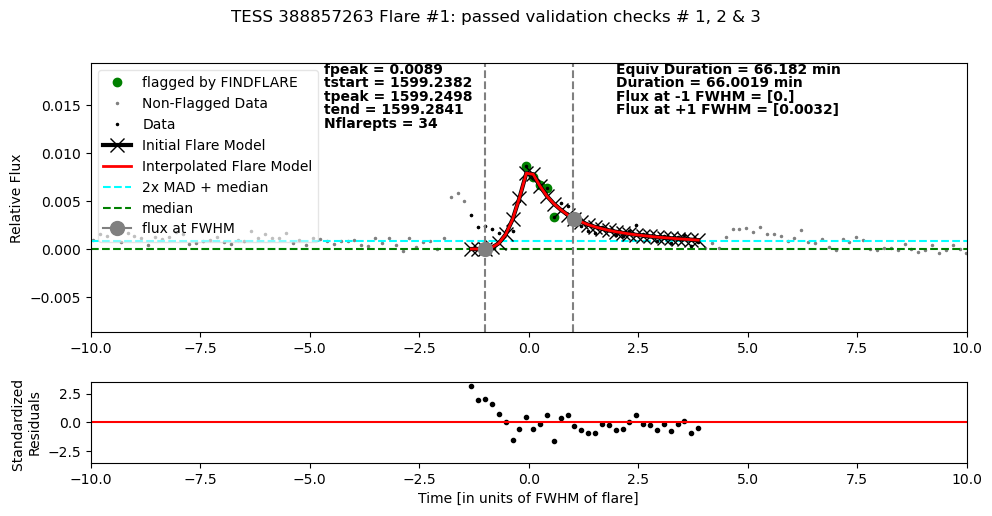

passed all conditions
 
Flare # 2
Flagged flare starts at: 1602.1105492938898
model flare len check 36 36


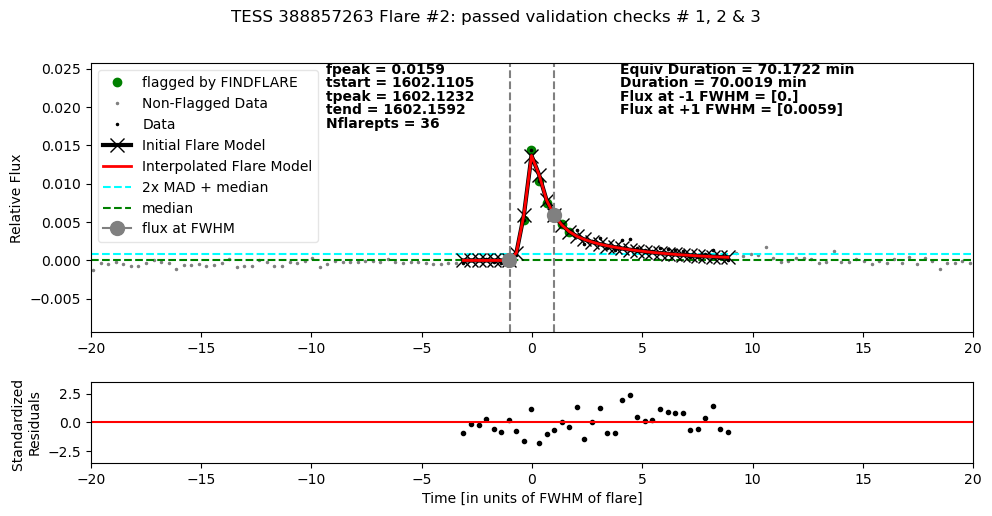

passed all conditions
 
Flare # 3
Flagged flare starts at: 1603.2550244212937
model flare len check 43 43


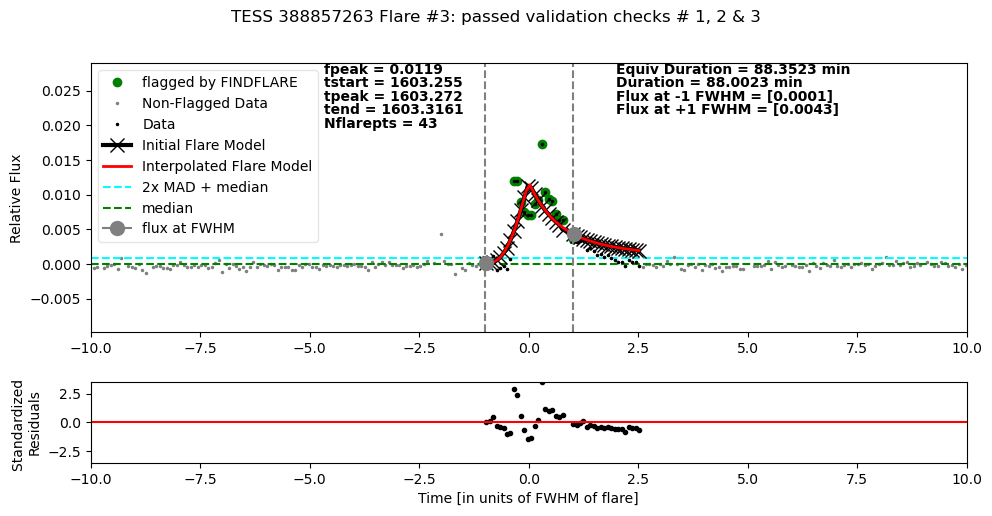

passed all conditions
 
Flare # 4
Flagged flare starts at: 1603.5633658154559
model flare len check 28 28


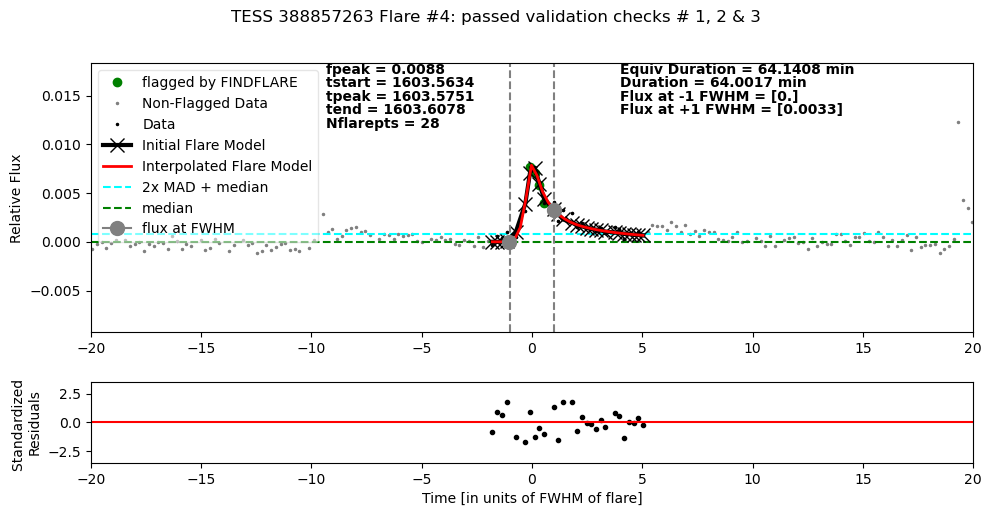

passed all conditions
 
Flare # 5
Flagged flare starts at: 1605.9370357220816
model flare len check 44 44


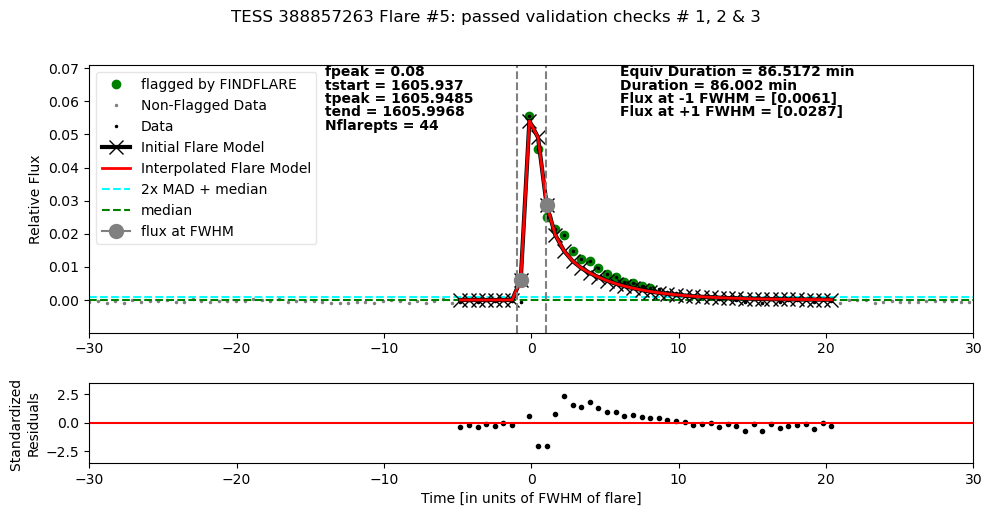

passed all conditions
 
Flare # 6
Flagged flare starts at: 1613.7149397501933
model flare len check 82 82


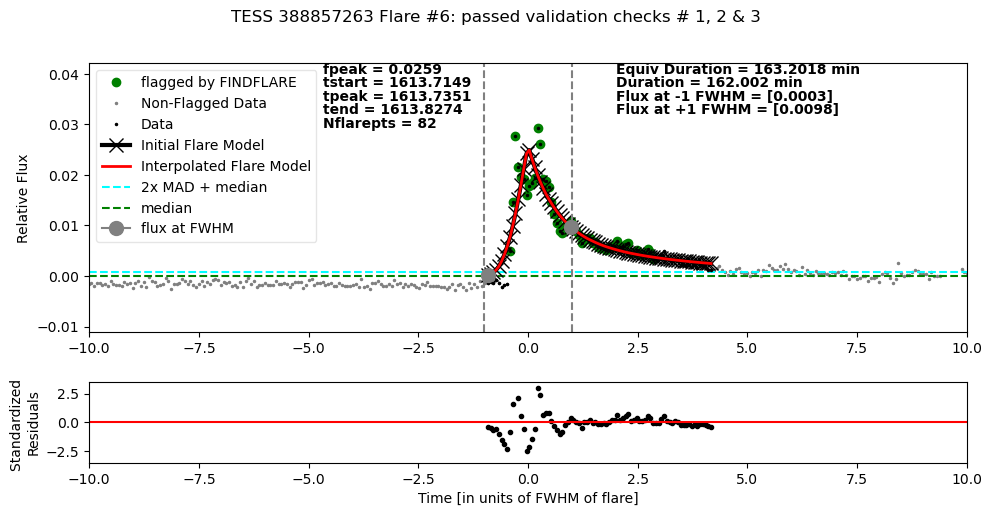

passed all conditions
 
Flare # 7
Flagged flare starts at: 1616.0510787837072
model flare len check 33 33


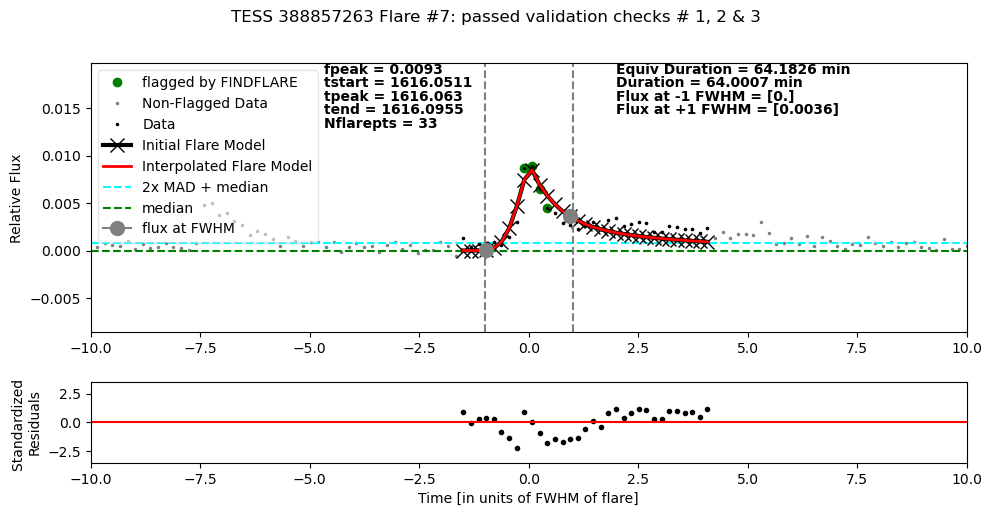

passed all conditions
 
Flare # 8
Flagged flare starts at: 1617.1747017687233
model flare len check 41 41


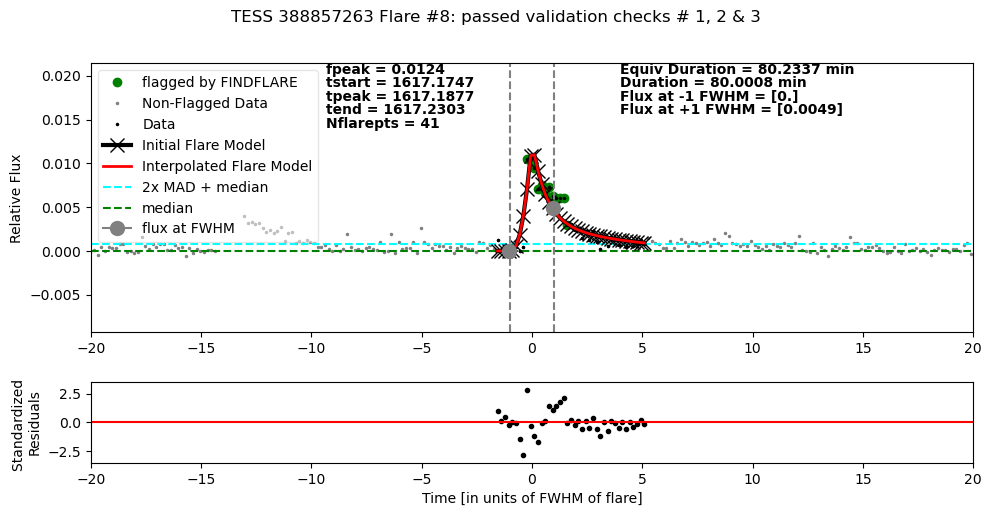

passed all conditions
 
Flare # 9
Flagged flare starts at: 1618.28165672185
model flare len check 51 51


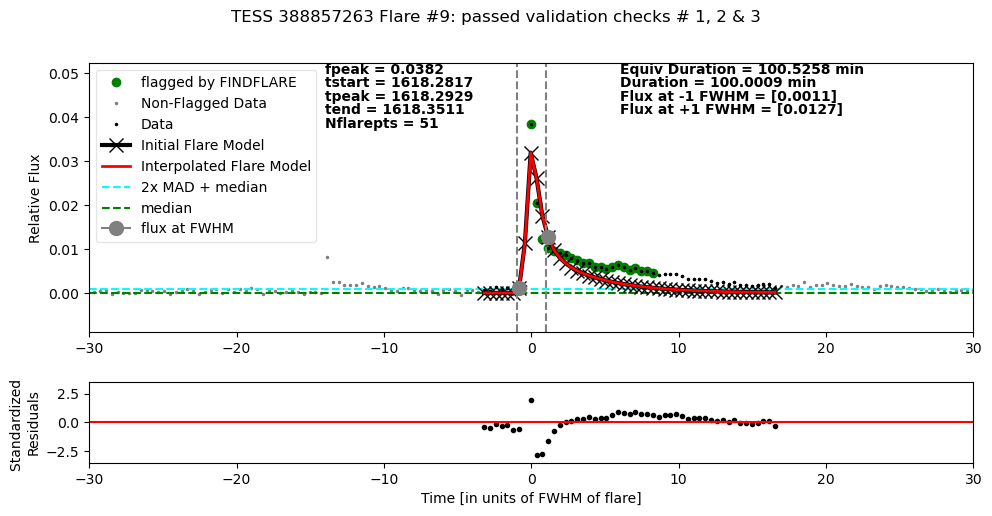

passed all conditions
 
Flare # 10
Flagged flare starts at: 1619.7316685319304
model flare len check 64 64


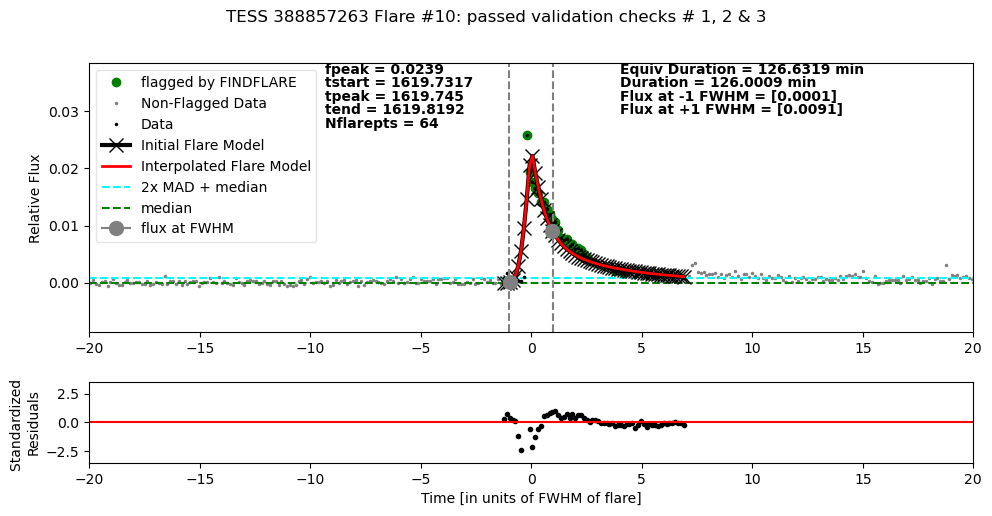

passed all conditions
 
Flare # 11
Flagged flare starts at: 1622.3927946294177
model flare len check 35 35


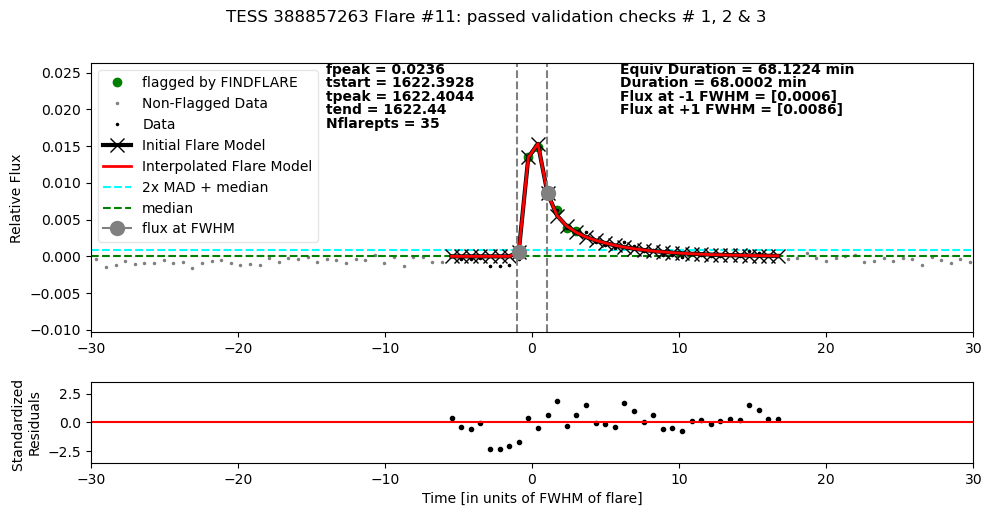

passed all conditions
 
Flare # 12
Flagged flare starts at: 1623.152519053401
model flare len check 61 61


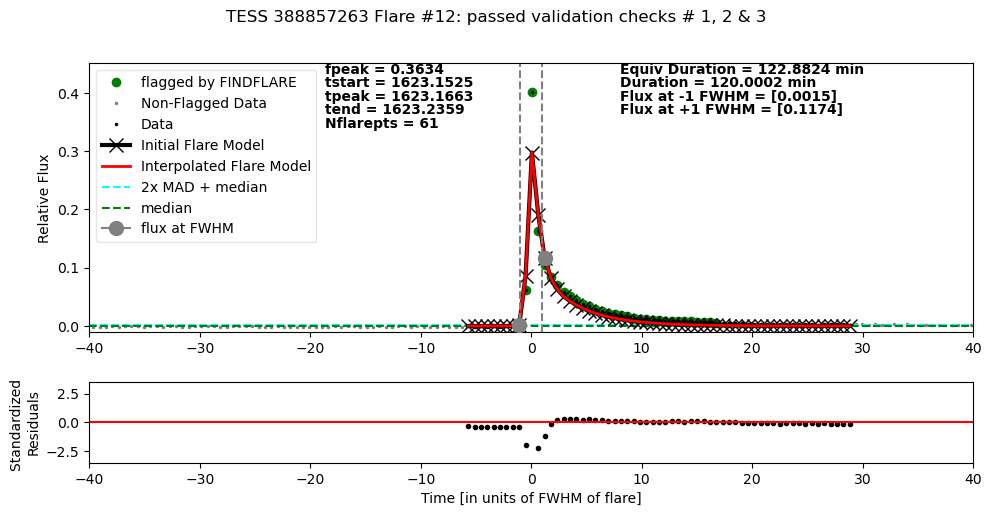

passed all conditions
 
Flare # 13
Flagged flare starts at: 1623.2608525897974
model flare len check 40 40


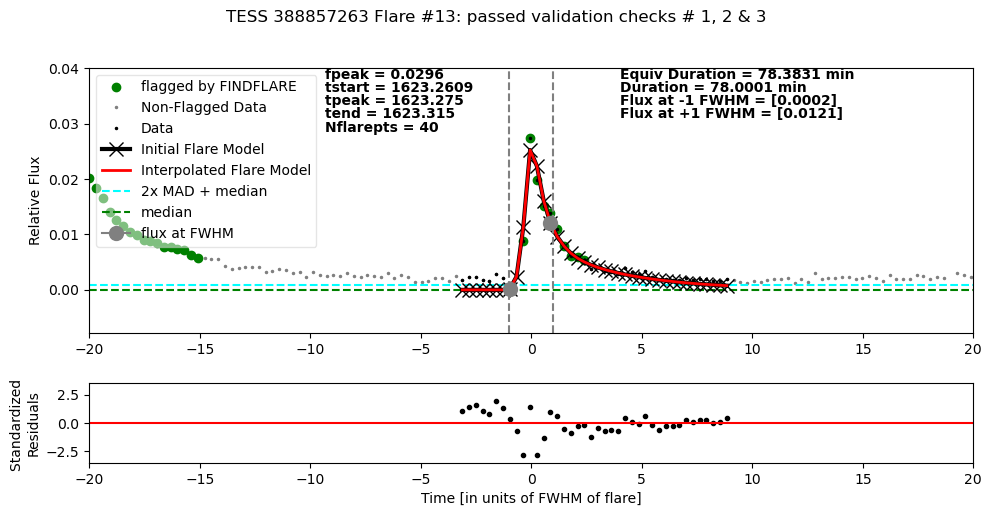

passed all conditions
 
Flare # 14
Flagged flare starts at: 1625.341401378643
model flare len check 38 38


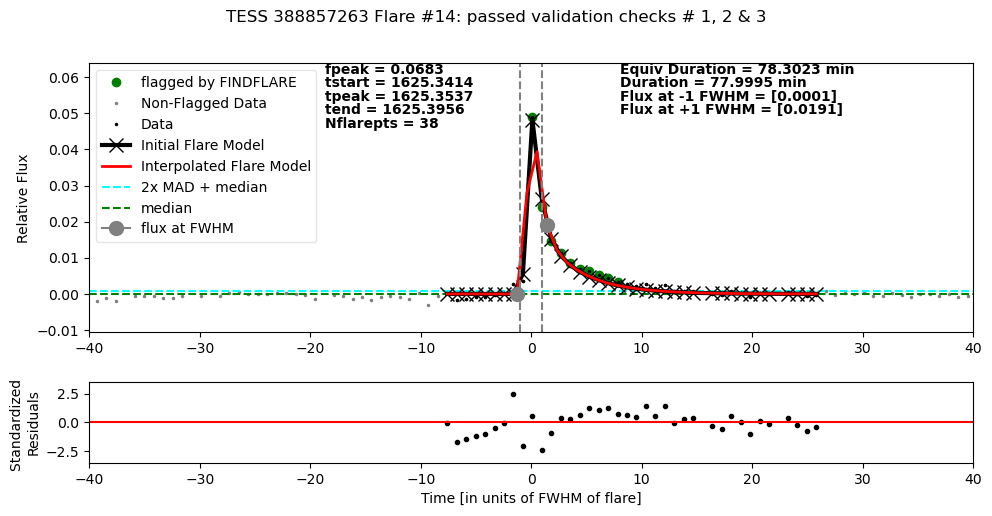

passed all conditions
 
Flare # 15
Flagged flare starts at: 1630.9038751401501
model flare len check 34 34


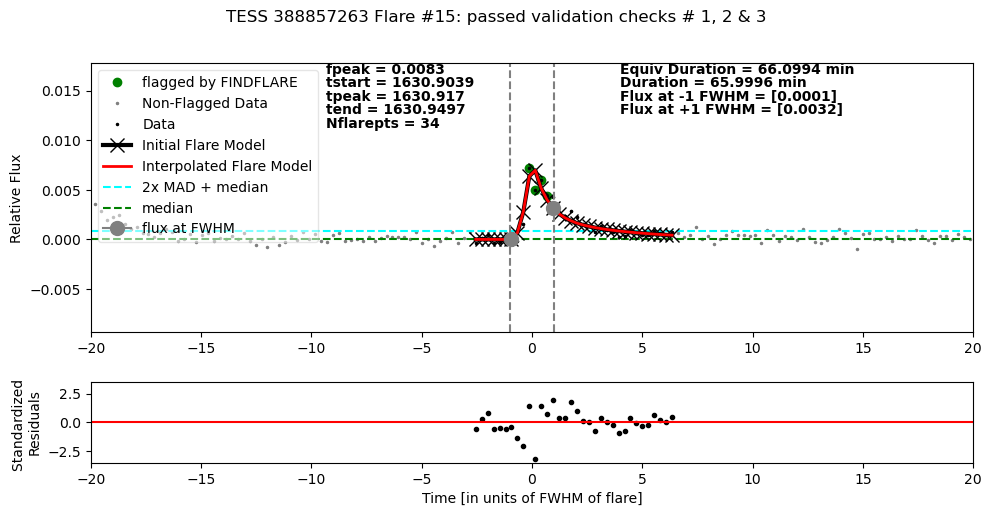

passed all conditions
 
Flare # 16
Flagged flare starts at: 1632.7121954710844
model flare len check 48 48


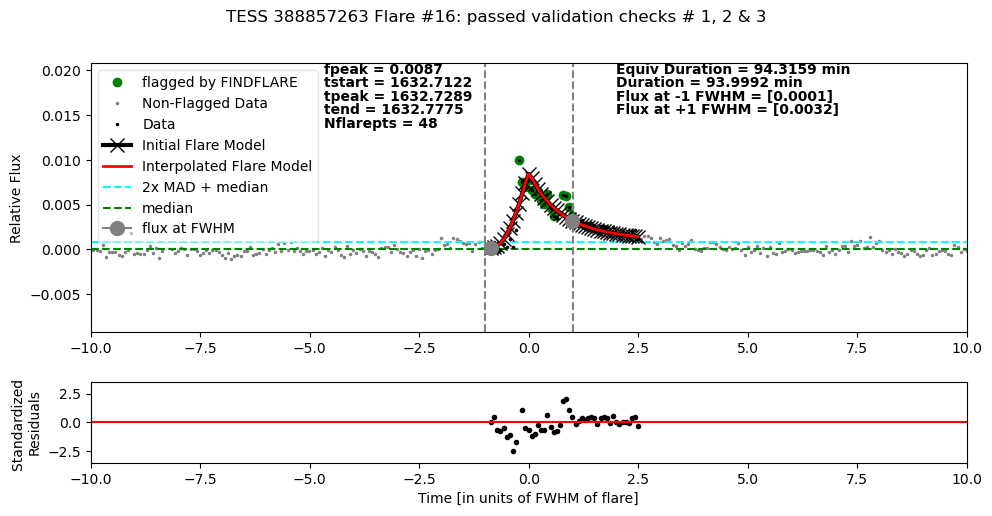

passed all conditions
 
Flare # 17
Flagged flare starts at: 1633.2483020817651
model flare len check 58 58


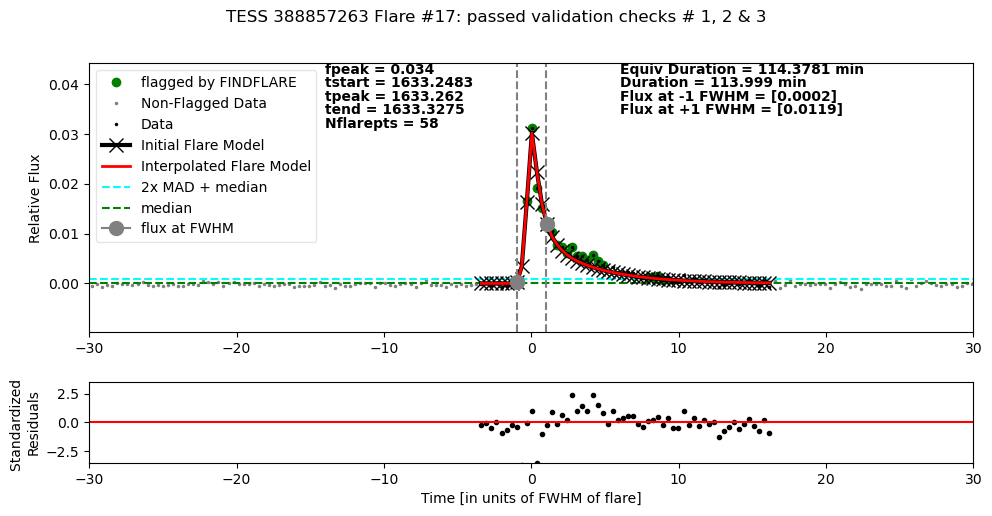

passed all conditions
 
Flare # 18
Flagged flare starts at: 1636.3899356617283
model flare len check 43 43


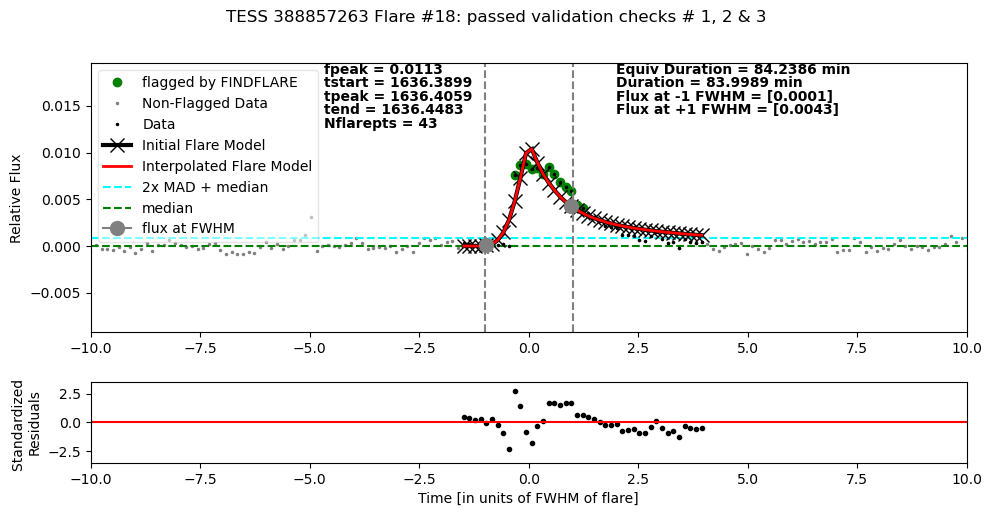

passed all conditions
 
Flare # 19
Flagged flare starts at: 1637.6760290979348
model flare len check 41 41


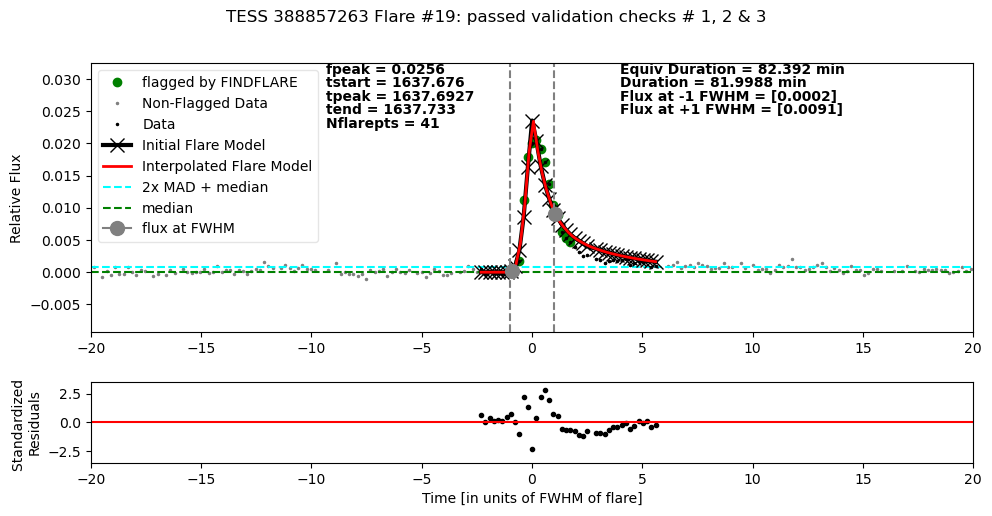

passed all conditions
 
Flare # 20
Flagged flare starts at: 1641.2079008823637
model flare len check 41 41


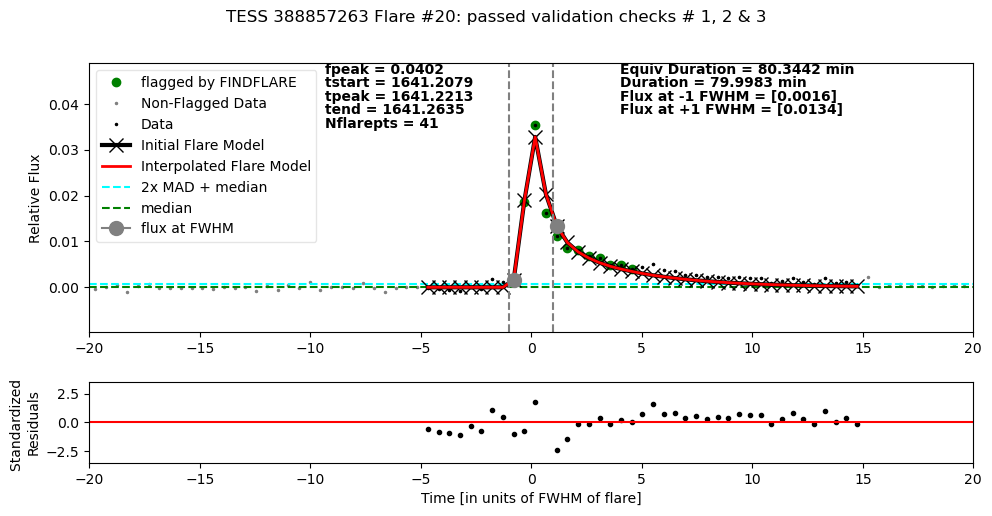

passed all conditions
 
Flare # 21
Flagged flare starts at: 1642.357876929076
model flare len check 36 36


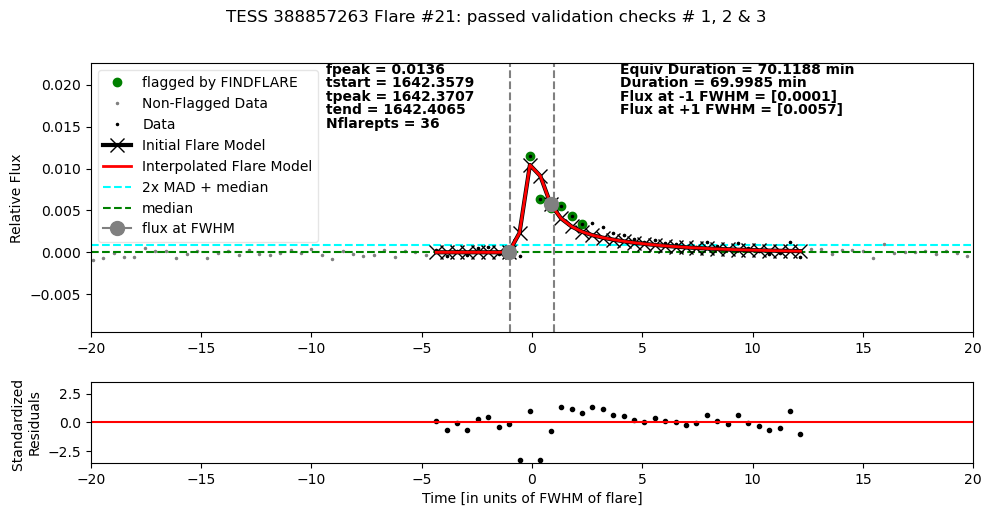

passed all conditions
 
Flare # 22
Flagged flare starts at: 1643.491186233784
model flare len check 34 34


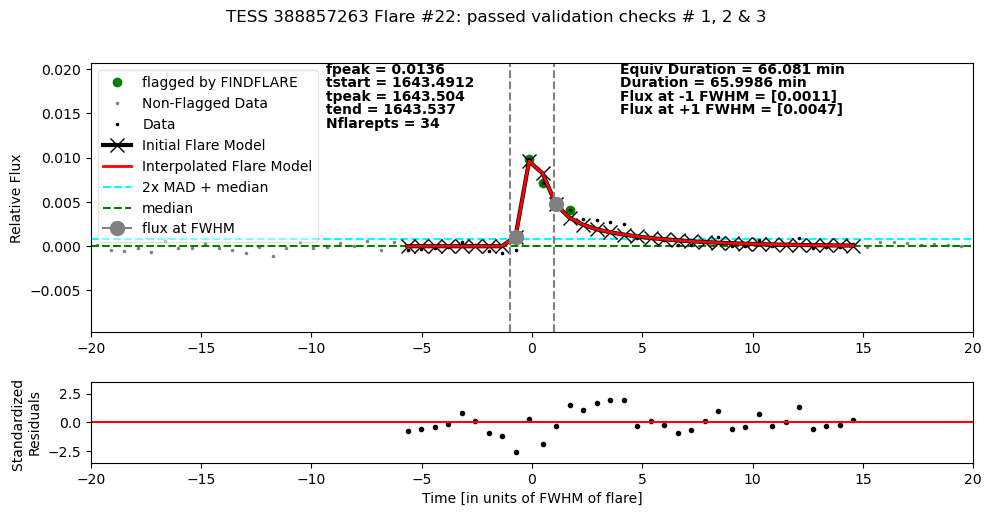

passed all conditions
 
Flare # 23
Flagged flare starts at: 1645.5161411324111
model flare len check 38 38


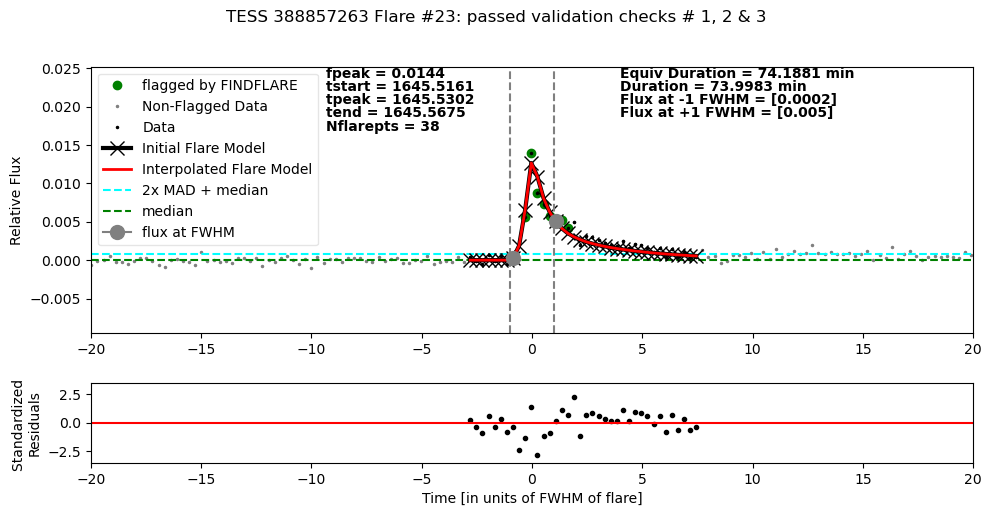

passed all conditions
 
Flare # 24
Flagged flare starts at: 1647.2883210129323
model flare len check 41 41


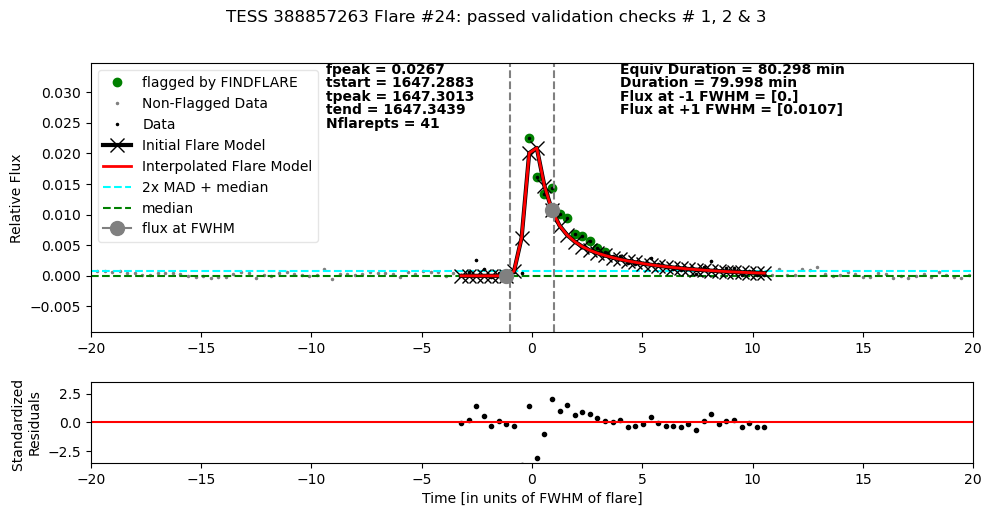

passed all conditions
 
Flare # 25
empty "dupe_mask" in separate flares ftn
ValueError: empty window?
len check: 0 0 0

 
Flare # 26
Flagged flare starts at: 1648.1452439116135
model flare len check 41 41


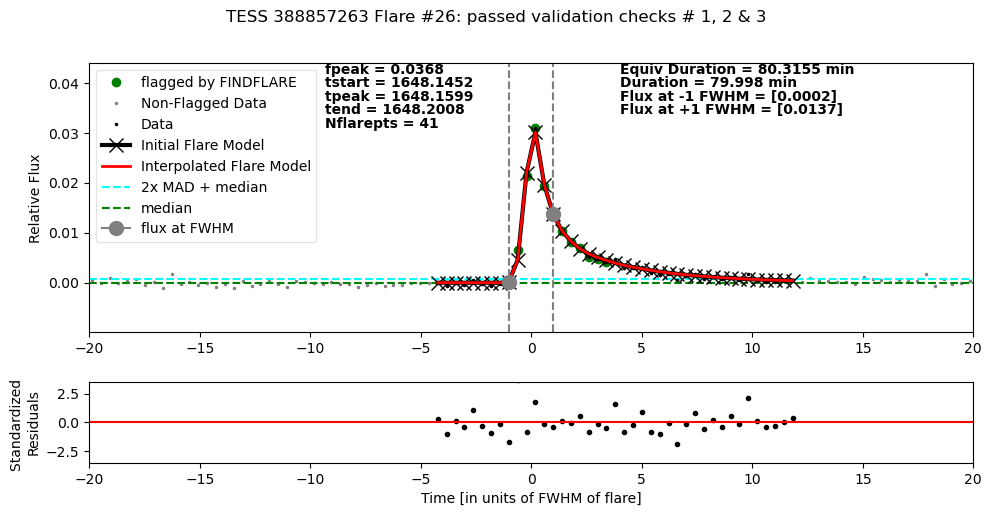

passed all conditions
 
Flare # 27
Flagged flare starts at: 1648.2369082300802
model flare len check 36 36


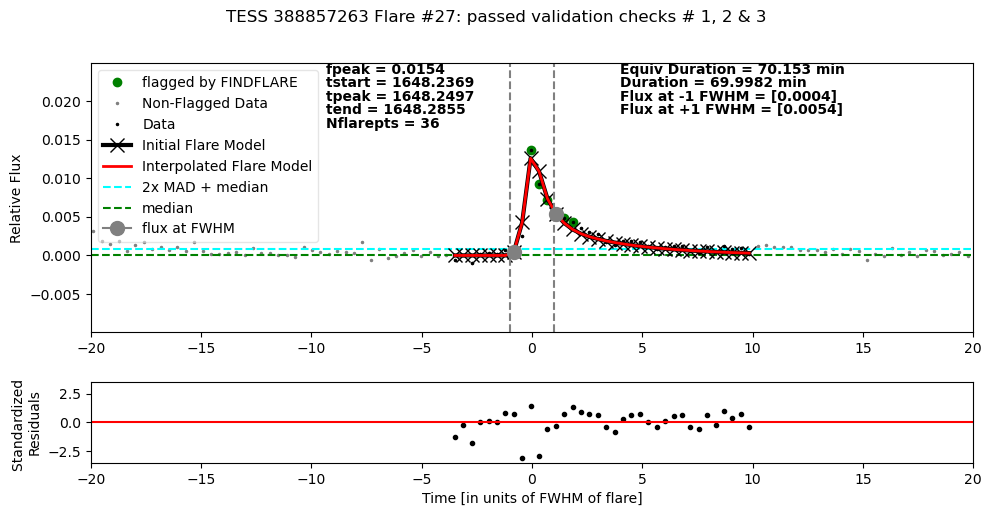

passed all conditions
 
Flare # 28
Flagged flare starts at: 1651.220160061611
model flare len check 39 39


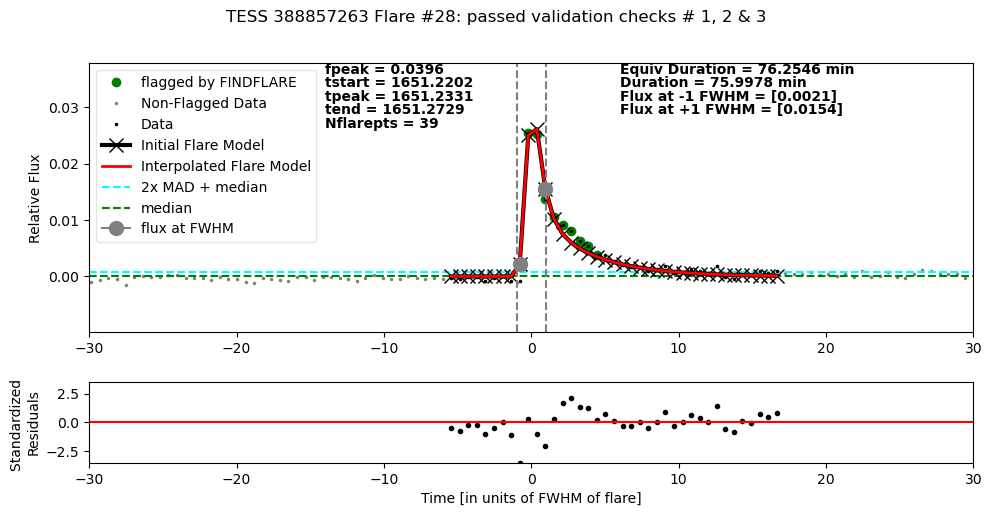

passed all conditions
 
Flare # 29
Flagged flare starts at: 1651.6243147979692
model flare len check 34 34


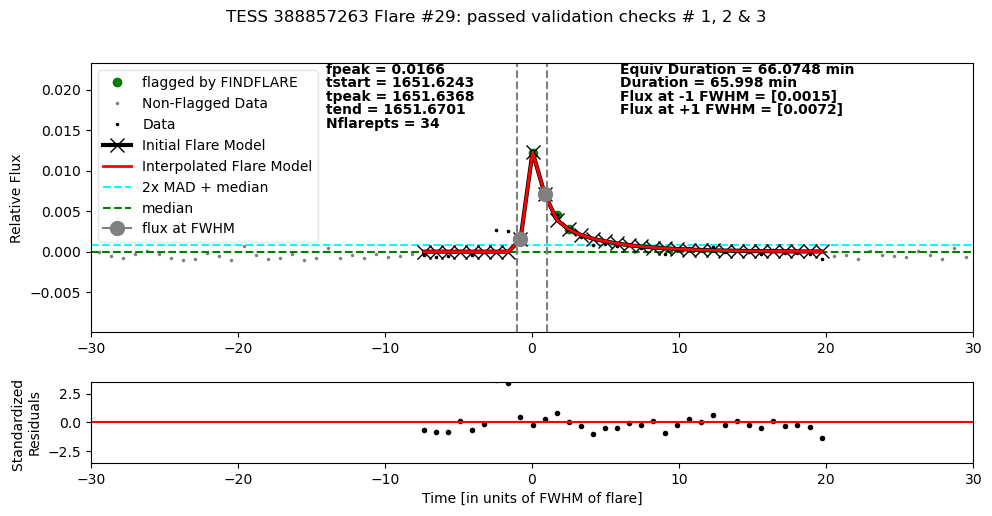

passed all conditions
 
Flare # 30
empty "dupe_mask" in separate flares ftn
ValueError: empty window?
len check: 0 0 0

 
Flare # 31
Flagged flare starts at: 1652.179853464728
model flare len check 44 44


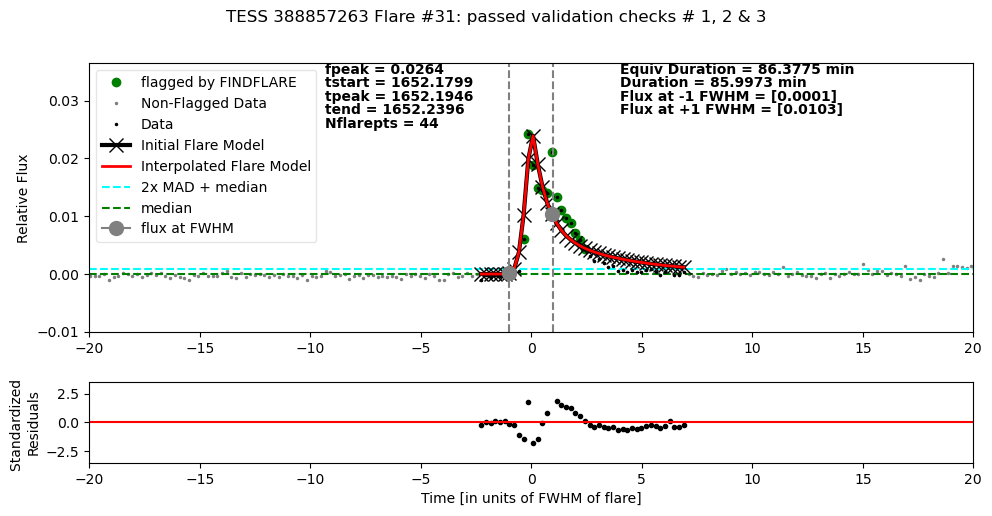

passed all conditions
Nflare times: 1238 N index_bigt: 1238



Creating Summary Plots
Ns: 0 Ys: 29


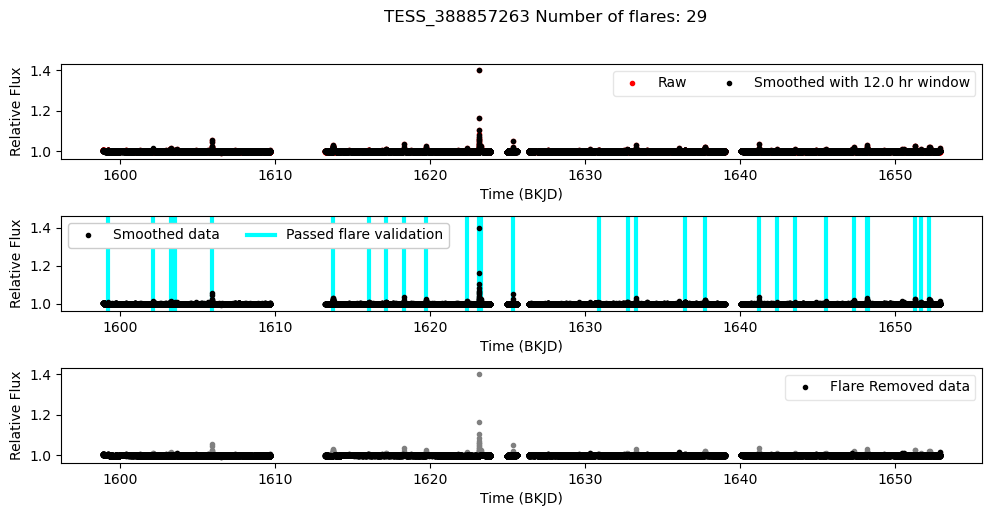

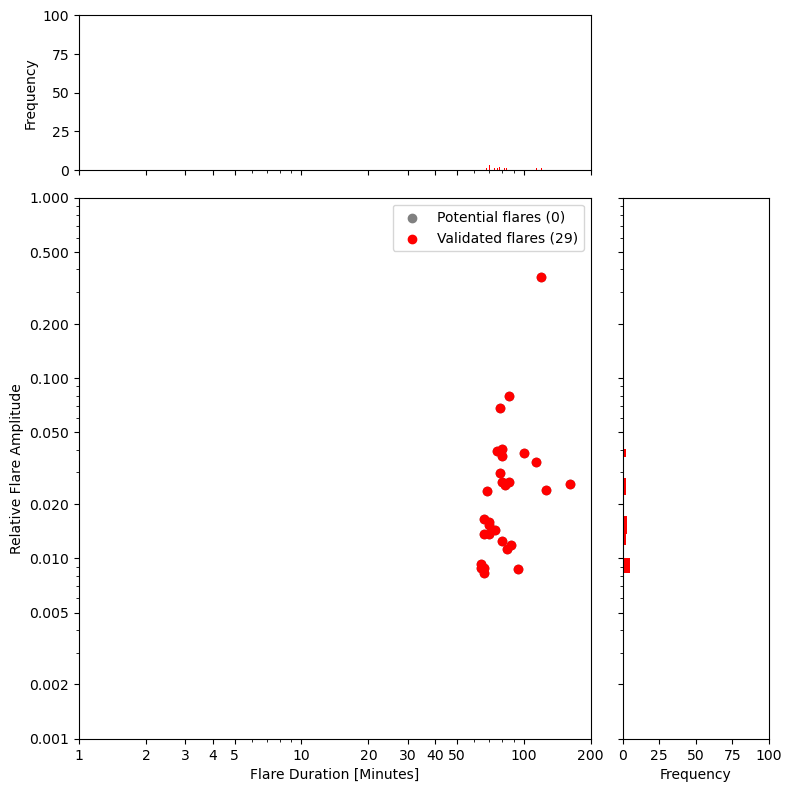

 
runtime:  9.432569026947021  seconds


In [29]:
# Applying "full_pipeline"

full_pipeline(ID, mission,cadence, inject_lc,\
              savepath, downloadpath, threshold_type=threshold_type, \
              N1=N1, N2=N2, N3=N3, smooth_window_in_hours=smooth_window_in_hours, \
              flare_sep_in_cadences=flare_sep_in_cadences,
              input_lc=inputLC2,\
              filter_type=filter_type,\
              show_figs=show_figs,verbose=verbose,\
              t_char_min=t_char_min,t_char_max = t_char_max )



# How to interpret these figures?

## For each detected flare, a figure is produced and shows which of the 3 validation criteria are passed. The validation criteria are:

### 1) Are the number of consecutive flare points above the noise threshold?
### 2) flux in decay is higher than flux in rise at +/- 1 FWHM & there is at least 1 data point between +/- 1 FWHM
### 3) check that peak flare time  +/- 1 FWHM is actually near +/-1 FWHM and that the sign (-/+) of the time stamps (before/after tpeak) are different. 

## For each detected flare, each figure also displays the flare template model fit to the data, the noise thresholds used for detection as well as text that shows the flare parameters measured.

All of these flares are packaged into a multi-page PDF file with the name `starname_flares_CadenceInSeconds_N1_N1Value_N2_N2Value_N3_N3Value_FlareTemplateVersion.pdf'"`

## At the end of flare detection & validation, a summary figure with 3 subpanels are shown. 
The top panel shows the raw light curve in red compared with the smoothed light curve in black. For datasets with minimal rotational variability and/or large flares, this may change may not be visually apparent due to scaling of the y-axis.

The middle panel shows the smooth light curve in black and validated flare events marked by cyan colored vertical lines and potential flare events that failed the 3 validation criteria in red vertical lines.

The bottom panel shows the smoothed light curve with validated flare events removed shown in black and the input light curve with the flare events still in it shown in grey.

## The last figure is a 2D histogram of Relative Flare Amplitude as a function of Flare Duration. 
Potential flares that failed all 3 validation criteria are shown in grey. Validated flares that passed all 3 validation crtieria are shown in red.

# Collecting results:

In [31]:
import pandas as pd
def get_flare_stuff(mission,ID,N1,N2,N3,savepath):
    FlareDF=pd.read_csv(savepath+mission+'_'+str(ID)+'_ModeledFlares_N1_'+str(N1)+'_N2_'+str(N2)+'_N3_'+str(N3)+'_Davenport.csv')
    LCDF=pd.read_csv(savepath+mission+'_'+str(ID)+'_LC_N1_'+str(N1)+'_N2_'+str(N2)+'_N3_'+str(N3)+'_Davenport.csv')
    cleanedDF=pd.read_csv(savepath+mission+'_'+str(ID)+'_cleanedLC_N1_'+str(N1)+'_N2_'+str(N2)+'_N3_'+str(N3)+'_Davenport.csv')
    LC_summary=pd.read_csv(savepath+mission+'_'+str(ID)+'_LC_summary_N1_'+str(N1)+'_N2_'+str(N2)+'_N3_'+str(N3)+'_Davenport.csv')
    Ns = LC_summary.loc[LC_summary['Validation']=='N'].reset_index(drop=True) #failed flare validation
    Ys = LC_summary.loc[LC_summary['Validation']=='Y'].reset_index(drop=True) #passed flare validation
    Models = pd.read_csv(savepath+mission+'_'+str(ID)+'_ModeledFlares_N1_'+str(N1)+'_N2_'+str(N2)+'_N3_'+str(N3)+'_Davenport.csv')
    return FlareDF, LCDF, cleanedDF, LC_summary, Ns, Ys, Models


FlareDF1, LCDF1, cleanedDF1, LC_summary1, Ns1, Ys1, Models1 = get_flare_stuff(mission,ID,N1,N2,N3,savepath)

In [43]:
FlareDF1.head(1)

,flare times,flare models
0,1599.238246,0.0


In [33]:
LCDF1.head(1)# input light curve and its smoothed version, along with fitted noise model

,Unnamed: 0,Raw Time,Raw Flux,Raw Error,Detrended Time,Detrended Flux,Detrended Error,Fitted trend
0,0,1598.93407,1.005195,0.000331,1598.93407,1.00477,0.002993,1.000423


In [34]:
cleanedDF1.head(1)# flare removed light curve

,Time,Flux,Error
0,1598.93407,1.005195,0.000331


In [42]:
LC_summary1.head(10) # flare parameters for each detected flare event

,tstart,tpeak,Fpeak,Npts,equiv_dur,dur,FWHM,Validation
0,1599.238246,1599.249846,0.008862,34.0,0.045960,0.045835,0.008847,Y
1,1602.110549,1602.123156,0.015863,36.0,0.048731,0.048612,0.004054,Y
2,1603.255024,1603.272043,0.011886,43.0,0.061356,0.061113,0.017508,Y
3,1603.563366,1603.575072,0.008813,28.0,0.044542,0.044446,0.006511,Y
4,1605.937036,1605.948454,0.080003,44.0,0.060081,0.059724,0.002372,Y
5,1613.714940,1613.735120,0.025927,82.0,0.113335,0.112501,0.022125,Y
6,1616.051079,1616.062989,0.009284,33.0,0.044571,0.044445,0.007972,Y
7,1617.174702,1617.187736,0.012435,41.0,0.055718,0.055556,0.008351,Y
8,1618.281657,1618.292911,0.038181,51.0,0.069810,0.069445,0.003517,Y
9,1619.731669,1619.744980,0.023892,64.0,0.087939,0.087501,0.010764,Y


In [37]:
Ys1.head(1) # for validated flares

,tstart,tpeak,Fpeak,Npts,equiv_dur,dur,FWHM,Validation
0,1599.238246,1599.249846,0.008862,34.0,0.04596,0.045835,0.008847,Y


In [39]:
Ns1.head(1) #for potential flares that failed validation, in this case there aren't any

,tstart,tpeak,Fpeak,Npts,equiv_dur,dur,FWHM,Validation


In [41]:
Models1.head(1) # flare models fit to data

,flare times,flare models
0,1599.238246,0.0
